## Exploring the Bitcoin Cryptocurrency Market

Explore the market capitalization of Bitcoin and other cryptocurrencies.

#### Project Description

To better understand the growth and impact of Bitcoin and other cryptocurrencies you will, in this project, explore the market capitalization of different cryptocurrencies.

<b>Warning:</b> The cryptocurrency market is exceptionally volatile, and any money you put in might disappear into thin air. Never invest money you can't afford to lose.

### Project Tasks

1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
2. Discard the cryptocurrencies without a market capitalization
3. How big is Bitcoin compared with the rest of the cryptocurrencies?
4. Making the plot easier to read and more informative
5. What is going on?! Volatility in cryptocurrencies
6. Well, we can already see that things are *a bit* crazy
7. Ok, those are... interesting. Let's check the weekly Series too.
8. How small is small?
9. Most coins are tiny

## 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 6th of December of 2017, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p

<center>
<img src="datasets//bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center>

<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p><em><sup>2</sup> <strong>Update on March 2020</strong>: Well, it turned out to be volatile indeed :D</em></p>
<p>That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [1]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt

#  Importing Numpy
import numpy as np

In [2]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

In [3]:
dec6

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [4]:
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [5]:
dec6.shape

(1326, 16)

In [6]:
dec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [7]:
dec6.columns

Index(['Unnamed: 0', '24h_volume_usd', 'available_supply', 'id',
       'last_updated', 'market_cap_usd', 'max_supply', 'name',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'price_btc', 'price_usd', 'rank', 'symbol', 'total_supply'],
      dtype='object')

In [8]:
dec6.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [9]:
data = dec6.copy()

In [10]:
data

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [11]:
data.shape

(1326, 16)

In [12]:
data.columns

Index(['Unnamed: 0', '24h_volume_usd', 'available_supply', 'id',
       'last_updated', 'market_cap_usd', 'max_supply', 'name',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'price_btc', 'price_usd', 'rank', 'symbol', 'total_supply'],
      dtype='object')

In [13]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = data[['id','market_cap_usd']]
display(market_cap_raw)

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN


In [14]:
# Counting the number of values
# ... YOUR CODE FOR TASK 2 ...

In [15]:
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [16]:
market_cap_raw.isnull().sum()

id                  0
market_cap_usd    295
dtype: int64

In [17]:
cap = market_cap_raw.dropna()

In [18]:
cap.isnull().sum()

id                0
market_cap_usd    0
dtype: int64

In [19]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

In [20]:
cap.nunique()

id                1031
market_cap_usd    1031
dtype: int64

## 2. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [21]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

In [22]:
cap

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1026,future-digital-currency,2.510000e+02
1027,environ,1.360000e+02
1028,caliphcoin,1.000000e+02
1029,falcoin,2.300000e+01


In [23]:
# Counting the number of values again
# ... YOUR CODE FOR TASK 3 ...

In [24]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

In [25]:
cap.isnull().sum()

id                0
market_cap_usd    0
dtype: int64

## 3. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

In [26]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index(keys='id')
display(cap10)

,market_cap_usd
id,
bitcoin,2.130493e+11
ethereum,4.352945e+10
bitcoin-cash,2.529585e+10
iota,1.475225e+10
ripple,9.365343e+09
dash,5.794076e+09
litecoin,5.634498e+09
bitcoin-gold,4.920065e+09
monero,4.331688e+09


In [27]:
# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x['market_cap_usd'] / cap['market_cap_usd'].sum()) * 100)
display(cap10)

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410
bitcoin-cash,2.529585e+10,6.758088
iota,1.475225e+10,3.941238
ripple,9.365343e+09,2.502063
dash,5.794076e+09,1.547956
litecoin,5.634498e+09,1.505323
bitcoin-gold,4.920065e+09,1.314454
monero,4.331688e+09,1.157262


In [28]:
# cap10.index

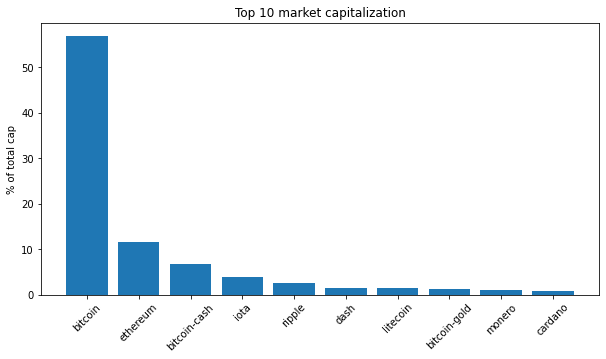

In [29]:
# Plotting the barplot with the title defined above
plt.figure(figsize=(10,5))
ax = plt.bar(cap10.index, cap10['market_cap_perc'])
# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
plt.title(TOP_CAP_TITLE)
plt.ylabel(TOP_CAP_YLABEL)
plt.xticks(rotation =45)
plt.show()

## 4. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

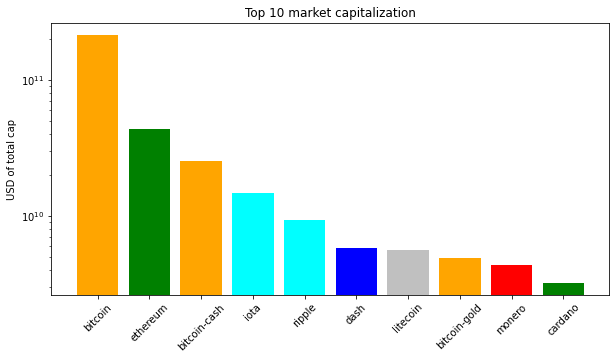

In [30]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
TOP_CAP_YLABEL = 'USD of total cap'
# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
plt.figure(figsize=(10,5))
ax = plt.bar(cap10.index, cap10['market_cap_usd'], color = COLORS, log = True)

# Annotating the y axis with 'USD'
# ... YOUR CODE FOR TASK 5 ...
plt.ylabel(TOP_CAP_YLABEL)

# Final touch! Removing the xlabel as it is not very informative
# ... YOUR CODE FOR TASK 5 ...
plt.title(TOP_CAP_TITLE)
plt.xticks(rotation = 45)
plt.show()

## 5. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [31]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = data[['id','percent_change_24h','percent_change_7d']]

In [32]:
# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id', drop=True)
volatility = volatility.dropna()
display(volatility, volatility.isnull().sum())


,percent_change_24h,percent_change_7d
id,,
bitcoin,7.33,17.45
ethereum,-3.93,-7.33
bitcoin-cash,-5.51,-4.75
iota,83.35,255.82
ripple,-3.70,-14.79
...,...,...
zsecoin,3.85,-11.44
tyrocoin,-79.02,-87.43
birds,10.62,-42.10


percent_change_24h    0
percent_change_7d     0
dtype: int64

In [33]:
# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by = 'percent_change_24h')
# Checking the first few rows
# ... YOUR CODE FOR TASK 6 ...
display(volatility.head(10))

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
bitok,-74.37,-71.67
bankcoin,-68.56,50.14
tellurion,-63.75,-52.59
shadow-token,-61.40,-59.05


## 6. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

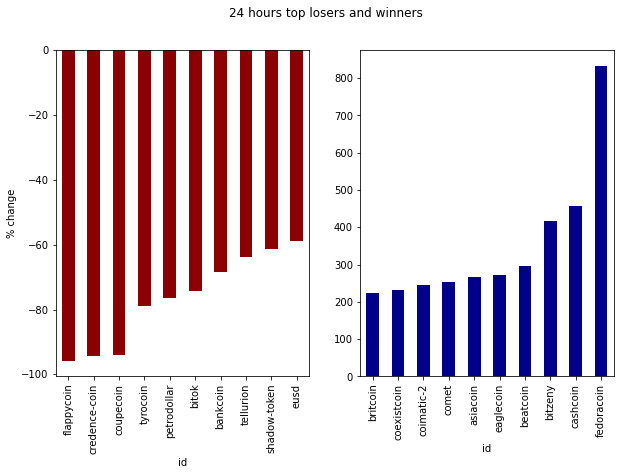

In [34]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color="darkred", ax=axes[0]))
    
    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar( color = "darkblue", ax = axes[1]))
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility['percent_change_24h'],DTITLE)

## 7. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

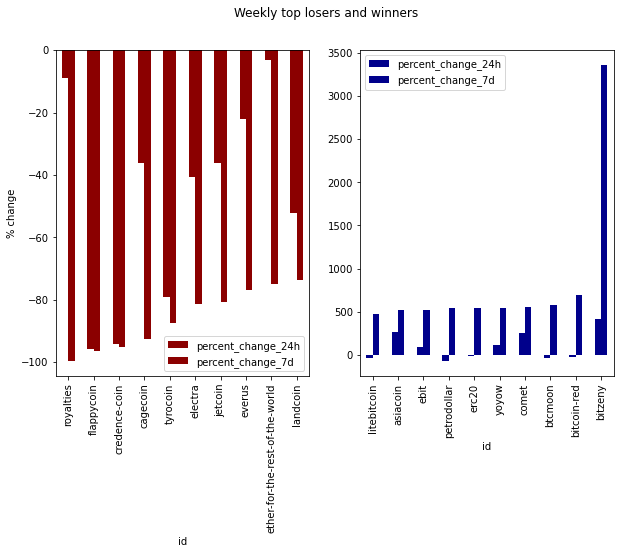

In [35]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by = 'percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d,WTITLE)

## 8. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [36]:
market_cap_raw

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN


In [37]:
# Selecting everything bigger than 10 billion 
largecaps = market_cap_raw.query('market_cap_usd > 1E+10')

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


## 9. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

<BarContainer object of 3 artists>

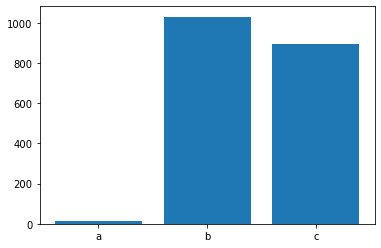

In [38]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 2000000000')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 or market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = [biggish,micro,nano]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...

labels = ["a", "b", "c"]
plt.bar(range(len(values)), values, tick_label=labels)

### Happy Learning :)